In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') #remove depricated warnings

In [3]:
df = sns.load_dataset('mpg') #miles per gallon

In [4]:
df.drop("name", axis =1, inplace=True)

In [5]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa
394,44.0,4,97.0,52.0,2130,24.6,82,europe
395,32.0,4,135.0,84.0,2295,11.6,82,usa
396,28.0,4,120.0,79.0,2625,18.6,82,usa


In [6]:
df.isna().sum()
# 6 null values in horsepower

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [7]:
df['horsepower'].median()

93.5

In [8]:
# impute null values with mean or median
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

In [9]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa
394,44.0,4,97.0,52.0,2130,24.6,82,europe
395,32.0,4,135.0,84.0,2295,11.6,82,usa
396,28.0,4,120.0,79.0,2625,18.6,82,usa


In [10]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [12]:
# we have object origin column
# we convert object origin column to numerical origin column
df.origin.unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [13]:
df.origin.value_counts()

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64

In [14]:
df['origin'] = df['origin'].map({"usa":1, "japan": 2, "europe": 3})

In [15]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,3
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1


In [16]:
X = df.drop('mpg', axis =1) # seperating mpg column into y
y = df['mpg']

In [17]:
X

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,8,307.0,130.0,3504,12.0,70,1
1,8,350.0,165.0,3693,11.5,70,1
2,8,318.0,150.0,3436,11.0,70,1
3,8,304.0,150.0,3433,12.0,70,1
4,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,1
394,4,97.0,52.0,2130,24.6,82,3
395,4,135.0,84.0,2295,11.6,82,1
396,4,120.0,79.0,2625,18.6,82,1


In [18]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [20]:
X_train.shape, X_test.shape

((278, 7), (120, 7))

In [21]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model

LinearRegression()

In [22]:
regression_model.fit(X_train, y_train)

LinearRegression()

In [23]:
for i, col_name in enumerate(X_train.columns):
    print(f"The coefficient for {col_name} is {regression_model.coef_[i]}")

The coefficient for cylinders is -0.3176142302799369
The coefficient for displacement is 0.026237482599078946
The coefficient for horsepower is -0.018270764913124595
The coefficient for weight is -0.007487750398361897
The coefficient for acceleration is 0.0504067346197138
The coefficient for model_year is 0.8470951427061365
The coefficient for origin is 1.5190958387975024


In [24]:
from sklearn.metrics import r2_score
y_pred_linear = regression_model.predict(X_test)
r2_score(y_test, y_pred_linear)

0.8348001123742285

In [25]:
#ridge regression
# when to use?
# When there is a overfitting

# Ridge will reduce the magnitude of coefficient but never make to zero

from sklearn.linear_model import Ridge
ridge_regression_model = Ridge(alpha=100)
ridge_regression_model.fit(X_train, y_train)
for i, col_name in enumerate(X_train.columns):
    print(f"The coefficient for {col_name} is {ridge_regression_model.coef_[i]}")
# none of the coeff has become zero

The coefficient for cylinders is -0.10121103813475338
The coefficient for displacement is 0.01549704723498359
The coefficient for horsepower is -0.015154146537673992
The coefficient for weight is -0.0072516011271230064
The coefficient for acceleration is 0.030640385245588053
The coefficient for model_year is 0.7914981246881716
The coefficient for origin is 0.7240611102907413


In [26]:
from sklearn.metrics import r2_score
y_pred = ridge_regression_model.predict(X_test)
r2_score(y_test, y_pred)

0.8350365150570258

In [27]:
#lasso regression
# when to use?
# When we want to select the feature

# lasso will make coefficient to zero, hence helps in feature selection
from sklearn.linear_model import Lasso
lasso_regression_model = Lasso(alpha=0.5)
lasso_regression_model.fit(X_train, y_train)
for i, col_name in enumerate(X_train.columns):
    print(f"The coefficient for {col_name} is {lasso_regression_model.coef_[i]}")
# the coeff has become zero means below 3 features was removed
# features( cylinders, acceleration, origin) are not selected to build the model 
# but other features are selected to build the model
# but still r^2 still remains same or close to 0.83

The coefficient for cylinders is -0.0
The coefficient for displacement is 0.006208198888300358
The coefficient for horsepower is -0.011058382987169565
The coefficient for weight is -0.0069826731680230885
The coefficient for acceleration is 0.0
The coefficient for model_year is 0.744654952003819
The coefficient for origin is 0.0


In [28]:
from sklearn.metrics import r2_score
y_pred = lasso_regression_model.predict(X_test)
r2_score(y_test, y_pred)

0.8277934716635555

In [29]:
# Always use Ridge and lasso in Multiple linear regression

In [30]:
from sklearn.linear_model import ElasticNet

# When to use?
# When we want both ridge and lasso
# Let algo decide which features need to be removed and which magnitude kept down

In [31]:
elastic_regression_model = ElasticNet(alpha=0.8, l1_ratio=0.4)
# be default l2 has 0.5 
# If we change value of L1 and L2 value is also changed
# the penality is a combination of L1 and L2
elastic_regression_model.fit(X_train, y_train)
for i, col_name in enumerate(X_train.columns):
    print(f"The coefficient for {col_name} is {elastic_regression_model.coef_[i]}")

The coefficient for cylinders is -0.0
The coefficient for displacement is 0.007991329781571462
The coefficient for horsepower is -0.013891824664720713
The coefficient for weight is -0.006988137750203173
The coefficient for acceleration is 0.0
The coefficient for model_year is 0.736838267738092
The coefficient for origin is 0.20426289739925593


In [32]:
from sklearn.metrics import r2_score
y_pred = elastic_regression_model.predict(X_test)
r2_score(y_test, y_pred)

0.8308672338152328

In [33]:
# CV => Cross Validation: Very Important
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv = 5)
lassocv.fit(X_train, y_train)
y_pred = lassocv.predict(X_test)
r2_score(y_test, y_pred)

0.8082805983844751

In [34]:
from sklearn.linear_model import LogisticRegressionCV

In [35]:
# Polynomial Regression

In [36]:
# np.random.seed(1)

In [37]:
X = 2*np.random.rand(100, 1)
X

array([[1.97121754],
       [1.62172196],
       [0.73696469],
       [1.62923112],
       [0.45775967],
       [0.06104028],
       [0.90403163],
       [0.67750953],
       [1.90669732],
       [1.00938991],
       [1.88177863],
       [1.90824153],
       [0.43085794],
       [1.90338564],
       [1.90104082],
       [0.36386262],
       [0.31637024],
       [0.4808099 ],
       [0.49444836],
       [0.35775772],
       [0.95095115],
       [0.02297601],
       [1.04102192],
       [1.65922483],
       [1.11084347],
       [1.76699431],
       [0.50496499],
       [0.51717088],
       [1.32792245],
       [1.68674625],
       [1.17906338],
       [1.47711234],
       [0.07571385],
       [0.01427182],
       [1.58603196],
       [0.9686216 ],
       [1.24981824],
       [0.85220181],
       [0.36683186],
       [1.37824705],
       [1.91431615],
       [1.05827697],
       [1.74669415],
       [0.42754648],
       [0.57894122],
       [1.39121389],
       [0.31544968],
       [0.659

In [38]:
Y = 4 + 3*X + 1.5*X**2 +  np.random.rand(100, 1)
Y

array([[16.38222113],
       [13.72149527],
       [ 7.54523754],
       [13.4194571 ],
       [ 5.70940719],
       [ 4.310768  ],
       [ 8.49996455],
       [ 7.12628555],
       [15.58199275],
       [ 8.90744041],
       [15.33190168],
       [15.81350372],
       [ 5.90974099],
       [15.16079061],
       [15.19088645],
       [ 5.367684  ],
       [ 5.82077132],
       [ 6.29768262],
       [ 5.90155586],
       [ 6.09949133],
       [ 9.14241241],
       [ 4.64742135],
       [ 9.38006305],
       [13.38574215],
       [ 9.71477911],
       [14.05834545],
       [ 6.38938659],
       [ 6.52021839],
       [11.2355189 ],
       [13.99398562],
       [ 9.88793879],
       [12.12722931],
       [ 5.14238713],
       [ 4.38947869],
       [13.12215348],
       [ 8.9097207 ],
       [10.63088569],
       [ 7.95912155],
       [ 5.64415164],
       [11.25851351],
       [15.82081657],
       [ 9.6016012 ],
       [14.71640265],
       [ 5.6929892 ],
       [ 6.38998424],
       [11

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [40]:
# How to fit polynomial degree
from sklearn.preprocessing import PolynomialFeatures

poly_feat = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_feat.fit_transform(X_train)
X_train_poly
# output having 2 columns because of polynomial degree 2

array([[7.36964689e-01, 5.43116954e-01],
       [5.52653295e-01, 3.05425664e-01],
       [1.33557180e-01, 1.78375204e-02],
       [8.46097480e-01, 7.15880945e-01],
       [3.57757716e-01, 1.27990583e-01],
       [9.68621601e-01, 9.38227807e-01],
       [5.28344735e-01, 2.79148159e-01],
       [5.17170878e-01, 2.67465717e-01],
       [3.15449680e-01, 9.95085004e-02],
       [3.66831858e-01, 1.34565612e-01],
       [5.14782270e-01, 2.65000785e-01],
       [1.35309083e+00, 1.83085481e+00],
       [1.79779954e+00, 3.23208319e+00],
       [1.40115229e-02, 1.96322775e-04],
       [1.31044033e+00, 1.71725385e+00],
       [1.91431615e+00, 3.66460634e+00],
       [1.00472868e+00, 1.00947972e+00],
       [9.29951004e-01, 8.64808870e-01],
       [1.65922483e+00, 2.75302703e+00],
       [1.58603196e+00, 2.51549738e+00],
       [1.86515336e+00, 3.47879707e+00],
       [1.06815348e-01, 1.14095185e-02],
       [9.77190201e-01, 9.54900690e-01],
       [3.63862620e-01, 1.32396006e-01],
       [5.871852

In [41]:
from sklearn.linear_model import LinearRegression
poly_reg = LinearRegression()
poly_reg

LinearRegression()

In [42]:
poly_reg.fit(X_train_poly, Y_train)

LinearRegression()

In [43]:
poly_reg.coef_

array([[3.33863377, 1.33570779]])

In [44]:
poly_reg.intercept_

array([4.3683082])

In [45]:
y_pred = poly_reg.predict(X_train_poly)
y_pred

array([[ 7.55420895],
       [ 6.6213746 ],
       [ 4.83803243],
       [ 8.14932558],
       [ 5.73368822],
       [ 8.85537919],
       [ 6.50511815],
       [ 6.45220841],
       [ 5.55439344],
       [ 5.77276577],
       [ 6.44094129],
       [11.33127   ],
       [14.68762118],
       [ 4.41534978],
       [11.03713788],
       [15.65435201],
       [ 9.07109924],
       [ 8.62820598],
       [13.58509191],
       [13.02345753],
       [15.24202858],
       [ 4.74016531],
       [ 8.90625671],
       [ 5.75995461],
       [ 6.78923892],
       [ 9.39743359],
       [11.59829234],
       [ 9.7468441 ],
       [ 6.394793  ],
       [11.23437881],
       [ 6.03989136],
       [ 8.00143353],
       [ 9.72523539],
       [ 6.17648956],
       [ 6.10643305],
       [15.96909471],
       [ 4.4457218 ],
       [15.77007685],
       [13.35320903],
       [ 7.12163196],
       [10.16165723],
       [16.2090309 ],
       [16.24479145],
       [14.2750452 ],
       [ 7.15271607],
       [14

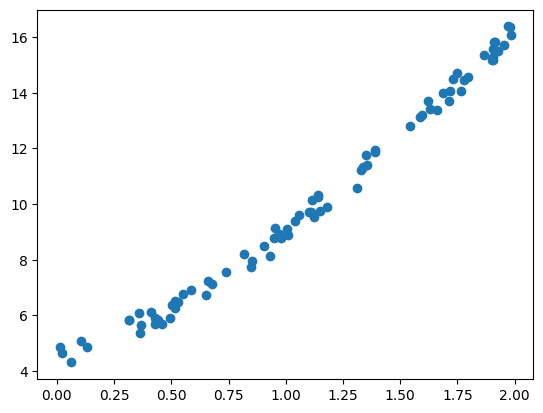

In [46]:
plt.scatter(X_train, Y_train, label="train data")
# data points are following linear shape

In [47]:
# calculate mean square error
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_train,y_pred)


###################################
# End of Linear Regression
###################################

0.06711508246002894